In [126]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

from IPython.display import Image

# Competitive League of Legends Game Winner Prediction

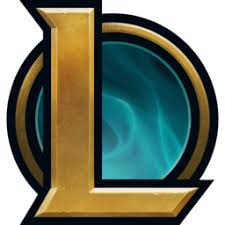

In [133]:
Image(filename='data/images/icon.jpg')

## Introduction

LoL is an online, 5 vs. 5 competitive PC game. It is one of - if not the most - popular game currently around. Despite that LoL has surprisingly little mainstream coverage, which is most likely due to its complexity - it’s not an easy game to understand.

LoL has a professional league. The top prize for the best team is over five million dollars and the average player makes a six-figure income. This data set aggregates basic statistics for every game since 2015 across all the professional leagues other than China.

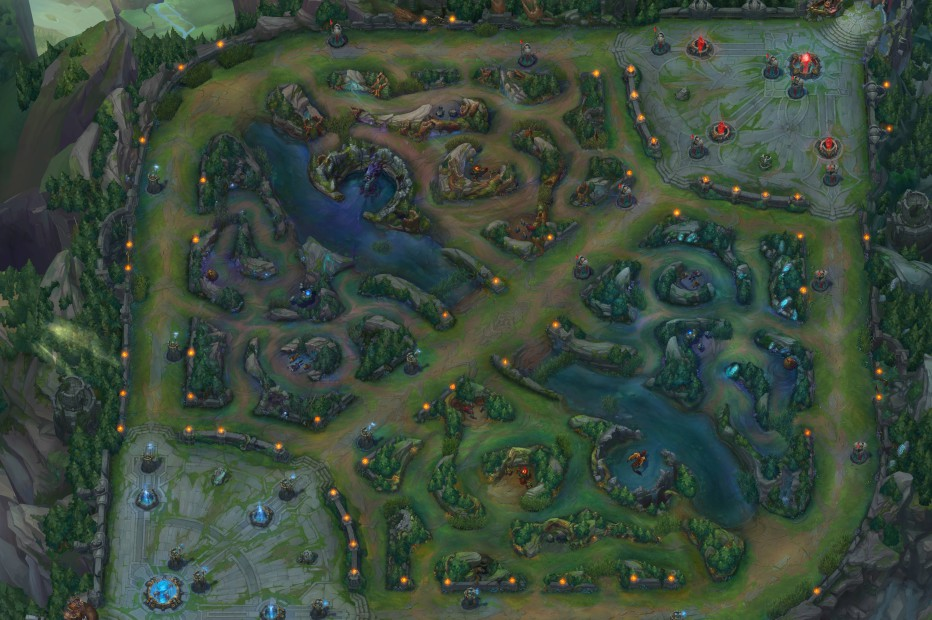

In [37]:
Image(filename='data/images/map.jpg')

## Datasets

We have an available dataset on kaggle for model training, the dataset includes competitive matches from 2015 to 2017. The matches include the NALCS, EULCS, LCK, LMS, and CBLoL leagues as well as the World Championship and Mid-Season Invitational tournaments :
- https://www.kaggle.com/datasets/chuckephron/leagueoflegends?resource=download

In [93]:
# Dataset
df = pd.read_csv("data/datasets/matchinfo.csv")
df.head()

,League,Year,Season,Type,blueTeamTag,bResult,rResult,redTeamTag,gamelength,blueTop,...,redTopChamp,redJungle,redJungleChamp,redMiddle,redMiddleChamp,redADC,redADCChamp,redSupport,redSupportChamp,Address
0,NALCS,2015,Spring,Season,TSM,1,0,C9,40,Dyrus,...,Gnar,Meteos,Elise,Hai,Fizz,Sneaky,Sivir,LemonNation,Thresh,http://matchhistory.na.leagueoflegends.com/en/...
1,NALCS,2015,Spring,Season,CST,0,1,DIG,38,Cris,...,Irelia,Crumbzz,JarvanIV,Shiphtur,Azir,CoreJJ,Corki,KiWiKiD,Annie,http://matchhistory.na.leagueoflegends.com/en/...
2,NALCS,2015,Spring,Season,WFX,1,0,GV,40,Flaresz,...,Sion,Saintvicious,LeeSin,Keane,Azir,Cop,Corki,BunnyFuFuu,Janna,http://matchhistory.na.leagueoflegends.com/en/...
3,NALCS,2015,Spring,Season,TIP,0,1,TL,41,Rhux,...,Gnar,IWDominate,Nunu,Fenix,Lulu,KEITH,KogMaw,Xpecial,Janna,http://matchhistory.na.leagueoflegends.com/en/...
4,NALCS,2015,Spring,Season,CLG,1,0,T8,35,Benny,...,Sion,Porpoise8,RekSai,Slooshi8,Lulu,Maplestreet8,Corki,Dodo8,Annie,http://matchhistory.na.leagueoflegends.com/en/...


In [132]:
df.shape

(7620, 30)

Riot games also provides an API from which we can fetch more actual data :
- https://developer.riotgames.com/apis

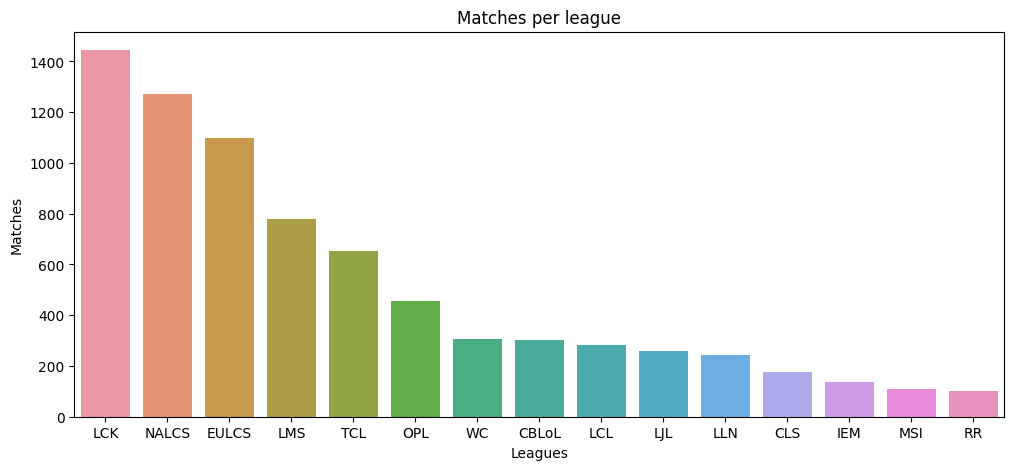

In [95]:
# Matches per league from dataset
matches_per_league = df.value_counts('League')

plt.figure(figsize=(12, 5))
sns.barplot(x=matches_per_league.index, y=matches_per_league.values)
plt.xlabel('Leagues')
plt.ylabel('Matches')
plt.title('Matches per league')
plt.show()

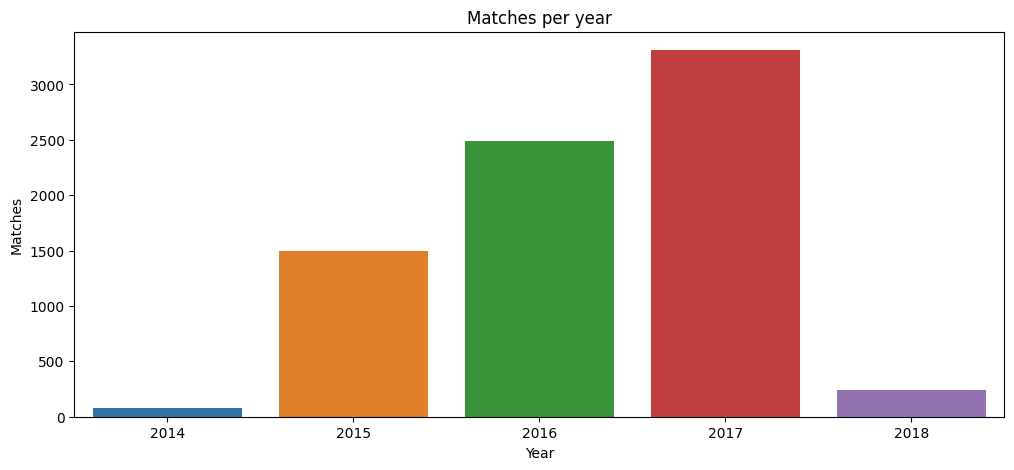

In [96]:
matches_per_year = df.value_counts('Year')

plt.figure(figsize=(12, 5))
sns.barplot(x=matches_per_year.index, y=matches_per_year.values)
plt.xlabel('Year')
plt.ylabel('Matches')
plt.title('Matches per year')
plt.show()

## Objective: Predicting the Winner of Competitive League of Legends Matches

The primary goal of this project is to develop a model that predicts the outcome of competitive 5v5 League of Legends matches. More than just a static pre-game prediction, the model should dynamically update the probability of winning as the game progresses, incorporating key events and game state changes.

### Key Phases of Prediction Updates:

- Champion Select & Ban Phase – Certain team compositions or meta-relevant champions may significantly impact win probability before the match even starts.

- Early Game Events – The first few minutes can heavily influence momentum:
  - First Blood (the first kill) provides an early gold and psychological advantage.
  - First Tower grants significant gold and better map control.

- Mid to Late Game Factors – Real-time tracking of key statistics such as:
  - Gold Difference – A leading indicator of overall team strength.
  - Kill Difference – Reflects combat dominance and potential snowballing.
  - Other Key Metrics (e.g., vision control, Baron/Dragon takes, turret count) could also be considered for improving prediction accuracy.

By continuously refining win probability based on these events, the model aims to provide real-time insights into a team's chances of winning as the match unfolds.

Useful link -> https://www.kaggle.com/discussions/general/330263

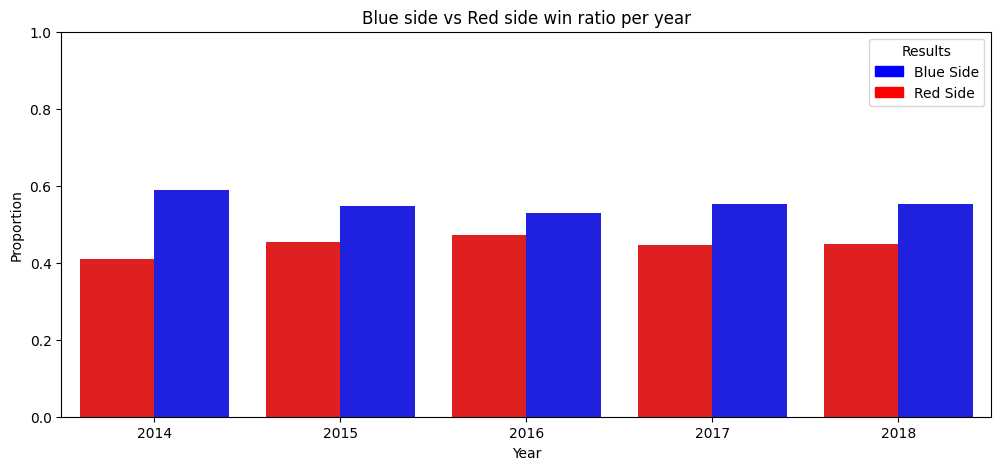

In [130]:
# Convert to a DataFrame
sides = pd.Series(df[['Year', 'bResult']].groupby(by='Year').value_counts(normalize=True)).reset_index()
sides.columns = ['Year', 'bResult', 'Value']

# Color palette
sides_palette = {1: "blue", 0: "red"}

# Plot using Seaborn
plt.figure(figsize=(12, 5))
sns.barplot(x="Year", y="Value", hue="bResult", data=sides, palette=sides_palette)

# Labels and title
plt.xlabel("Year")
plt.ylabel("Proportion")
plt.title("Blue side vs Red side win ratio per year")
plt.ylim(0, 1)
# Create a custom legend with colored patches
blue_patch = mpatches.Patch(color='blue', label='Blue Side')
red_patch = mpatches.Patch(color='red', label='Red Side')
plt.legend(handles=[blue_patch, red_patch], title="Results")
plt.show()